In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# step -1
def initialize_parameters(lenw):
    w = np.random.randn(1,lenw)
    b = 0
    return w,b

In [46]:
# step -2
def forward_prop(X, w, b):
    z = np.dot(w,X) + b
    return z

In [47]:
# step -3
def cost_function(z, y):
    m = y.shape[1]
    J = (1/(2*m))*np.sum(np.square(z-y))
    return J

In [48]:
# step -4
def back_prop(X, y, z):
    m = y.shape[1]
    dz = (1/m)*(z-y)
    dw = np.dot(dz, X.T)
    db = np.sum(dz)
    return dw, db

In [49]:
# step -5
def gradient_descent_update(w,b,dw,db,learninig_rate):
    w = w - learninig_rate*dw
    b = b - learninig_rate*db
    return w,b

In [71]:
# step -6
def linear_regression_model(x_train, y_train, x_val, y_val, learning_rate, epochs):
    lenw = x_train.shape[0]
    w,b = initialize_parameters(lenw)

    costs_train = []
    m_train = y_train.shape[1]
    m_val = y_val.shape[1]

    for i in range(1,epochs+1):
        z_train = forward_prop(x_train, w, b)
        cost_train = cost_function(z_train, y_train)
        dw, db = back_prop(x_train, y_train, z_train)
        w,b = gradient_descent_update(w,b,dw, db, learning_rate)

        # store learning cost in a list for plotting purpose
        if i%10 == 0:
            costs_train.append(cost_train)

        # MAE_train
        MAE_train = (1/m_train)*np.sum(np.abs(z_train, y_train))

        # cost_val, MAE_val
        z_val = forward_prop(x_val, w, b)
        cost_val = cost_function(z_val, y_val)
        MAE_val = (1/m_val)*np.sum(np.abs(z_val, y_val))

        #print out cost_train, cost_val, MAE_train, MAE_val
        print("Epochs ", i, "/", epochs, " :")
        print("Training cost = ", cost_train, " | validation cost = ", cost_val)
        print("Training MAE = ", MAE_train, " | Valdation MAE = ", MAE_val)

    plt.plot(costs_train)
    plt.show()

# Testing on Boston Dataset

In [51]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [52]:
boston = load_boston()

In [53]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [54]:
boston['data'].shape

(506, 13)

In [55]:
bost = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [56]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [57]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [58]:
X = (bost-bost.mean())/(bost.max() - bost.min())

In [59]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-7.021173e-18,7.898820e-18,-7.828608e-16,-1.579764e-17,6.389268e-16,-1.544219e-15,-3.405269e-16,1.404235e-16,0.000000,2.808469e-17,-2.341561e-15,1.976460e-15,-1.088282e-16
std,9.667929e-02,2.332245e-01,2.514792e-01,2.539940e-01,2.384314e-01,1.346268e-01,2.898956e-01,1.914822e-01,0.378576,3.216357e-01,2.303134e-01,2.302054e-01,1.970492e-01
min,-4.054410e-02,-1.136364e-01,-3.913775e-01,-6.916996e-02,-3.491668e-01,-5.218690e-01,-6.763636e-01,-2.423813e-01,-0.371713,-4.222083e-01,-6.229291e-01,-8.985678e-01,-3.014090e-01
25%,-3.969297e-02,-1.136364e-01,-2.179904e-01,-6.916996e-02,-2.174795e-01,-7.647718e-02,-2.425325e-01,-1.541223e-01,-0.241279,-2.466358e-01,-1.122908e-01,4.716191e-02,-1.573693e-01
50%,-3.773202e-02,-1.136364e-01,-5.303441e-02,-6.916996e-02,-3.435197e-02,-1.458793e-02,9.191657e-02,-5.343258e-02,-0.197800,-1.493075e-01,6.324111e-02,8.766445e-02,-3.568055e-02
75%,7.143872e-04,1.136364e-02,2.552500e-01,-6.916996e-02,1.426028e-01,6.492922e-02,2.626169e-01,1.267068e-01,0.628287,4.919138e-01,1.855815e-01,9.973011e-02,1.187069e-01
max,9.594559e-01,8.863636e-01,6.086225e-01,9.308300e-01,6.508332e-01,4.781310e-01,3.236364e-01,7.576187e-01,0.628287,5.777917e-01,3.770709e-01,1.014322e-01,6.985910e-01


In [60]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071


In [61]:
y = boston['target']

In [62]:
y.shape

(506,)

In [63]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=5)

In [64]:
x_train.shape

(339, 13)

In [65]:
x_train = x_train.T
x_train.shape

(13, 339)

In [66]:
y_train = np.array([y_train])

In [67]:
y_train.shape

(1, 339)

In [68]:
x_val = x_val.T
y_val = np.array([y_val])

In [69]:
x_val.shape, y_val.shape

((13, 167), (1, 167))

ation cost =  9.929765899401215e-05
Training MAE =  1.0047985973404723  | Valdation MAE =  1.0389300310739824
Epochs  389 / 500  :
Training cost =  1.0706780587749615e-06  | validation cost =  9.913046407402932e-05
Training MAE =  1.0048360237238505  | Valdation MAE =  1.0389687158710053
Epochs  390 / 500  :
Training cost =  1.0495056662880728e-06  | validation cost =  9.896507510194745e-05
Training MAE =  1.004873078647891  | Valdation MAE =  1.0390070163595662
Epochs  391 / 500  :
Training cost =  1.028754853586228e-06  | validation cost =  9.880147125731558e-05
Training MAE =  1.004909765830262  | Valdation MAE =  1.0390449363860317
Epochs  392 / 500  :
Training cost =  1.0084172245699591e-06  | validation cost =  9.863963198277955e-05
Training MAE =  1.0049460889514197  | Valdation MAE =  1.0390824797582732
Epochs  393 / 500  :
Training cost =  9.88484550356173e-07  | validation cost =  9.847953698035905e-05
Training MAE =  1.0049820516549872  | Valdation MAE =  1.0391196502460487


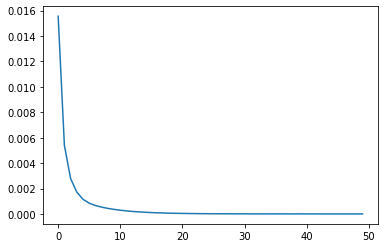

In [72]:
linear_regression_model(x_train, y_train, x_val, y_val, 0.4, 500)

# Compare our model with sklearn linear regression

In [73]:
from sklearn import linear_model

In [74]:
linear_regression = linear_model.LinearRegression()
model = linear_regression.fit(x_train.T, y_train.T)
predictions = linear_regression.predict(x_val.T)

In [75]:
predictions.shape

(167, 1)

In [76]:
MAE_val_with_sklearn = (1/y_val.shape[1])*np.sum(np.abs(predictions-y_val.T))

In [77]:
MAE_val_with_sklearn

0.001183122279249755